In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif

d:\python36\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


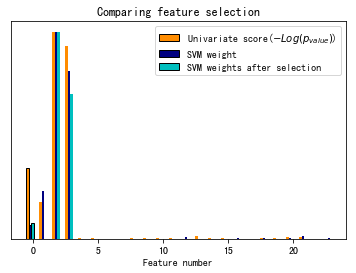

In [6]:
iris = datasets.load_iris()
E = np.random.uniform(0, 0.1, size=(len(iris.data),20))

X = np.hstack((iris.data, E))
y = iris.target

plt.figure(1)
plt.clf()

X_indices = np.arange(X.shape[-1])

selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2, label=r'Univariate score($-Log(p_{value})$)',color='darkorange', edgecolor='black')

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

svm_weights = (clf.coef_**2).sum(axis=0)
svm_weights /= svm_weights.max()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight', color='navy', edgecolor='black')

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X), y)

svm_weights_selected = (clf_selected.coef_**2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected, width=.2, label='SVM weights after selection', color='c', edgecolor='black')
plt.title('Comparing feature selection')
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()